# **Analyzing Time Series Data**

### Loading data set
> In this call records that were answered and abondened are analyzed with dates

> Data set link - http://data.gov.lk/dataset/gic-call-1919-answered-abandoned-weekly-average-report-13112016-2562017 - 
**GIC Call (1919) Answered /Abandoned Weekly Average Report (13.11.2016 to 25.6.2017)**

- As data set in xls form, conversion is done. First the daily records for total received calls were exrtacted to a csv and imported.
- Then first rows are printed to take a look at the data present
- Indexed using date

In [56]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("daily.csv",parse_dates=True,index_col=0)
df.columns = ['All received']
df

,All received
date,
2016-11-07,6065.0
2016-11-08,5691.0
2016-11-09,5754.0
2016-11-10,5620.0
2016-11-11,5672.0
...,...
2017-06-26,NaN
2017-06-27,NaN
2017-06-28,NaN


### Basic plot
To identity the basic behaviour of data, it was plotted against time. In that missing data ranges can be found

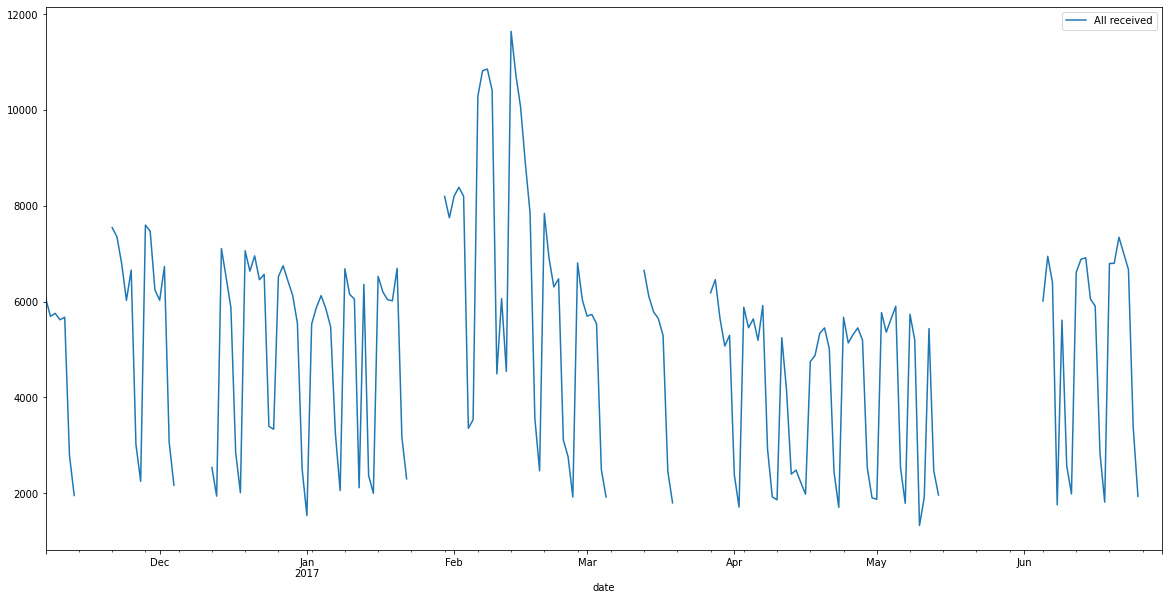

In [57]:
df.plot(figsize=(20,10))
plt.show()

### Handling missing data
> As there are many discontinuities, it should be handled. As the predicting will not provide better reliability with continuous missing data, a continuous part is selected.

> Therefore date range from 2017-03-27 to 2017-05-14 is selected

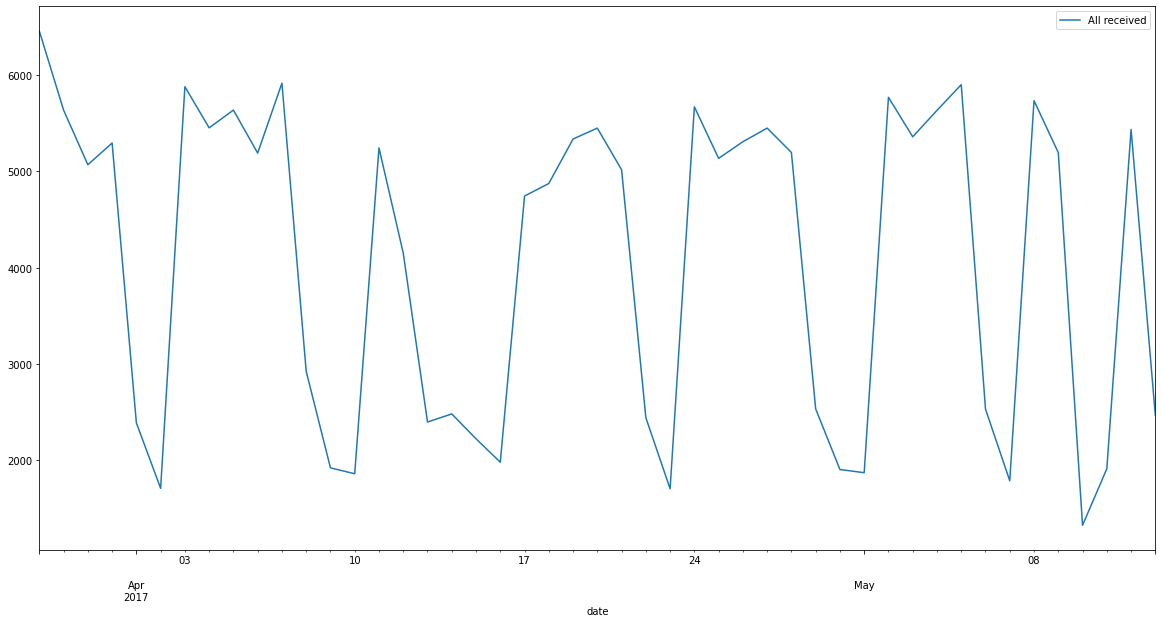

In [58]:
import datetime

def select_date(date):
    return date > datetime.datetime(2017, 3, 27) and date < datetime.datetime(2017, 5, 14)

df = df[df.index.to_series().apply(select_date)]
df.plot(figsize=(20,10))

> By looking at the data in the selected period, a cyclic time series can be identified

### Moving averages
> Moving averages of data plotting

- Window sizes of 3 and 5 are plotted to select a better graph

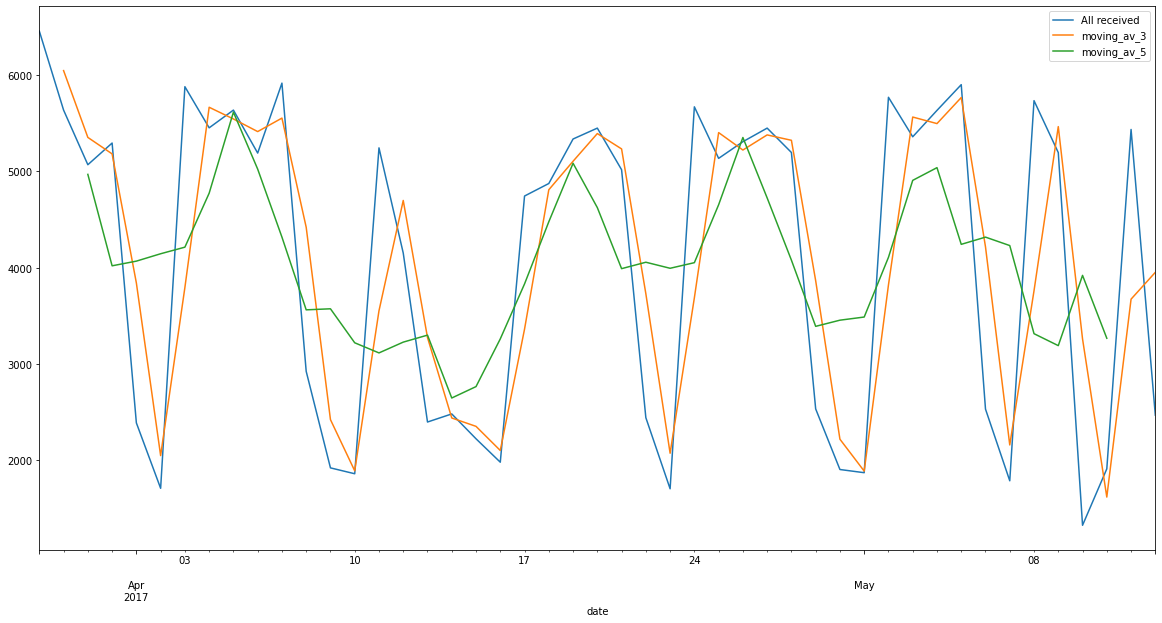

In [59]:
df1 = df.copy(deep=True)
df1['moving_av_3'] = df1.iloc[:,0].rolling(window=2, center=True).mean()
df1['moving_av_5'] = df1.iloc[:,0].rolling(window=5, center=True).mean()
df1.plot(figsize=(20,10))
plt.show()

> It can be seen that the moving average of window 3 is better than window size 5 as the moving average with window size 3 keeps the actual data variation

### Exponential smooting
> Exponential smoothing of data plotting

- Smoothing constants of 0.2 and 0.3 are plotted to select a better graph

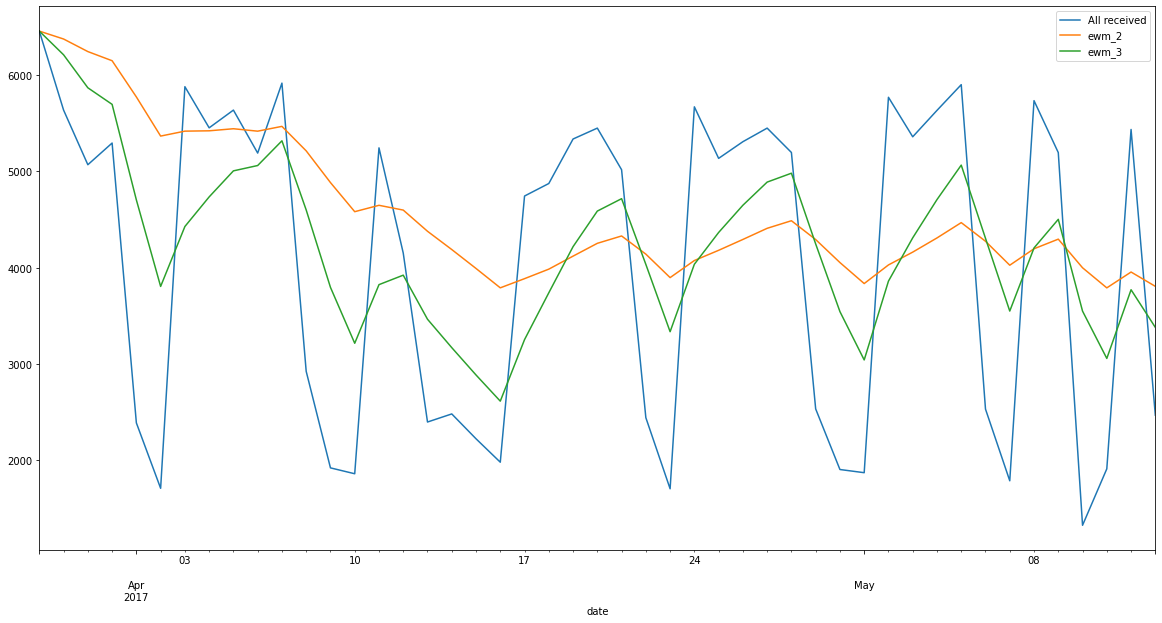

In [60]:
df2 = df.copy(deep=True)
df2["ewm_2"] = df2.iloc[:,0].ewm(alpha=0.1,adjust=False).mean()
df2["ewm_3"] = df2.iloc[:,0].ewm(alpha=0.3,adjust=False).mean()
df2.plot(figsize=(20,10))
plt.show()

> With a higher smoothing constant, we can get the insight that there is a negative trend in the given period

### Understanding long-term trends and seasonality

> To understand the seasonal behaviour and long-term trents seasonal_decompose was used and the result is plotted

<Figure size 576x432 with 0 Axes>

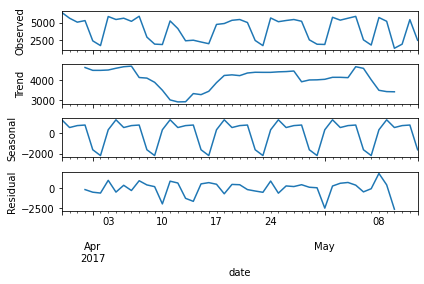

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pyplot import figure

result = seasonal_decompose(df)
figure(figsize=(8, 6))
fig = result.plot()

### Prediction with Prophet

> Prophet library can be used to predict the data to future. By using this, the missing data can be predicted

In [62]:
from fbprophet import Prophet
model = Prophet()
train_df = df.rename(columns={"All received":'y'})
train_df["ds"] = train_df.index
model.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


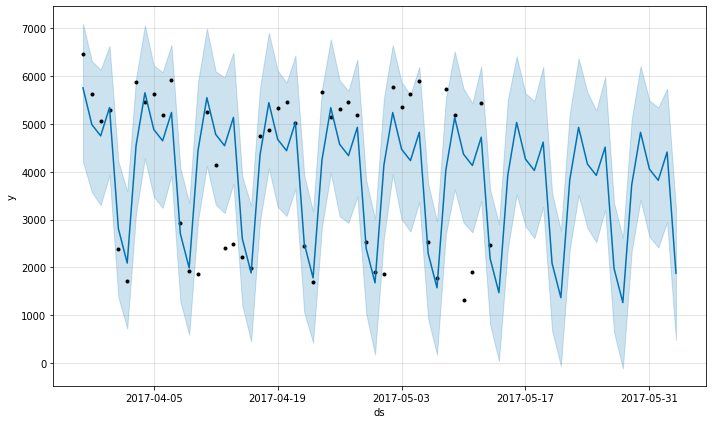

In [63]:
pd.plotting.register_matplotlib_converters()
future = model.make_future_dataframe(21, freq='d', include_history=True)
forecast = model.predict(future)
fig1 = model.plot(forecast)

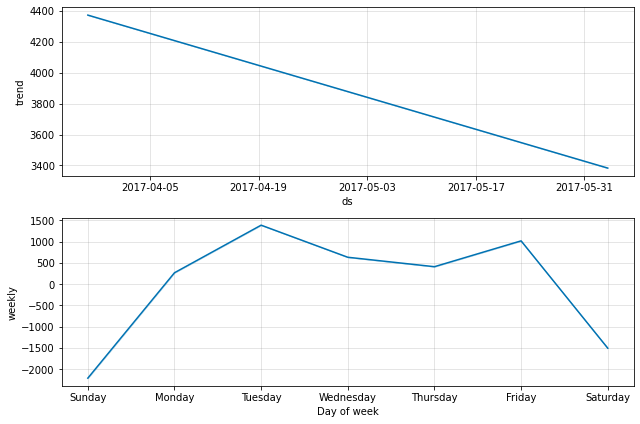

In [64]:
fig2 = model.plot_components(forecast)

### Insight

> By looking at the weekly variation of the call records, it can be seen that it is cyclic with a time period of a week and minimum demand can be expected in the weekends. In tuesday, the incoming call frequency can be high and there is a slight increase in that in fridays as well